# Example 2: Tracking of a single optically trapped particle with DeepTrack 1.0

Example code to use DeepTrack to track a single optically trapped particle.
See also Figure 2.

<strong>DeepTrack 1.0</strong><br/>
Digital Video Microscopy enhanced with Deep Learning<br/>
version 1.0 - 30 November 2018<br/>
© Saga Helgadottir, Aykut Argun & Giovanni Volpe<br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INITIALIZATION

In [1]:
import deeptrack

## 2. PLAY VIDEO TO BE TRACKED

The video to be tracked is played. 

Change the video file in the code to view different videos:

1. DeepTrack - Example 2 - Optically Trapped Particle Good.mp4
2. DeepTrack - Example 2 - Optically Trapped Particle Bad.mp4

Note that the video file must be in the same folder as this notebook.

In [2]:
%%HTML

<video width="400" height="400" controls>
<source src="DeepTrack - Example 2 - Optically Trapped Particle Good.mp4" type="video/mp4">
</video>

## 2. CHECK IMAGE GENERATION ROUTINE

Here, we simulate images of single particles similar to those we want to track. The particle position is chosen randomly from a normal distribution with mean of 0 and standard deviation of 2 pixels. The particle has a radius between 2 and 3 pixels, and a point-spread function obtained from the combination of a Bessel functions of first and second order of positive and negative intensity respectively, resulting in a particle with a dark ring around a bright center. The image background, SNR and gradient intensity are randomly selected from a wide range of values. This results in particle images corresponding to a dark ring around a brigth center on a brigth or dark background with varying SNR and gradient intensity. This image generator was used to train the pretraiend network saved in the file "DeepTrack - Example 2 - Pretrained network.h5".

Comments:
1. The <strong>image_parameters_function</strong> is a lambda function that determines the kind of particle images for which the deep learning network will be trained. Tuning its parameters is the simplest way to improve the tracking performance.<br/>
2. The <strong>image_generator</strong> is a lambda function that works as image genrator. It does not need to be changed in most cases.<br/>
3. The parameter <strong>number_of_images_to_show</strong> determines the number of sample images that are shown.
4. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.

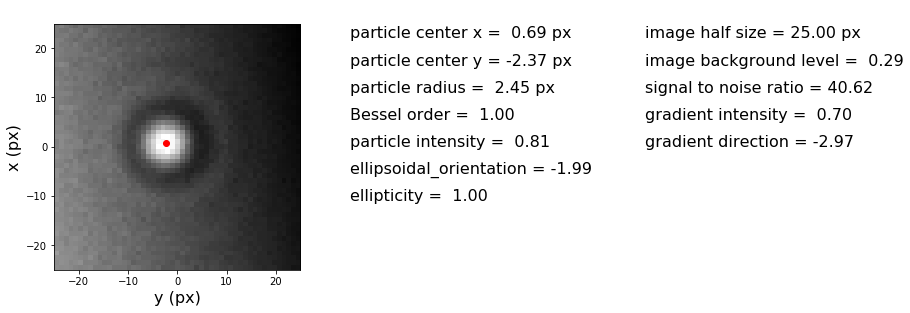

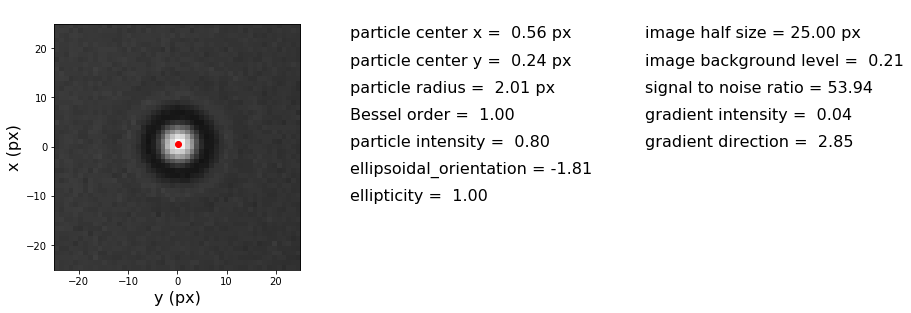

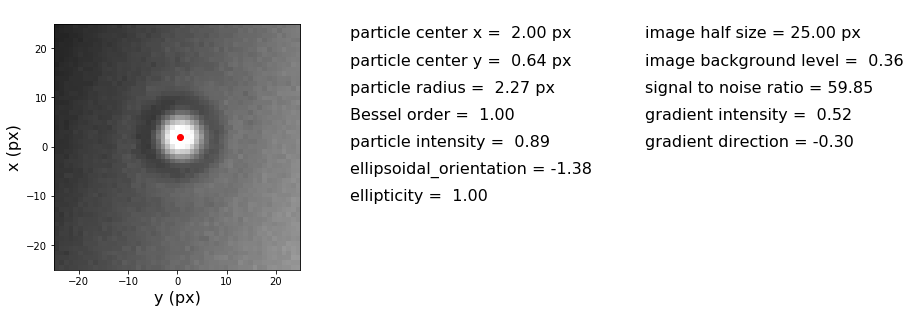

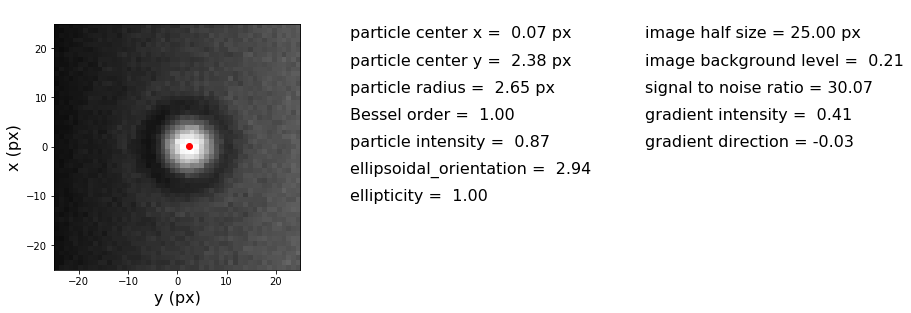

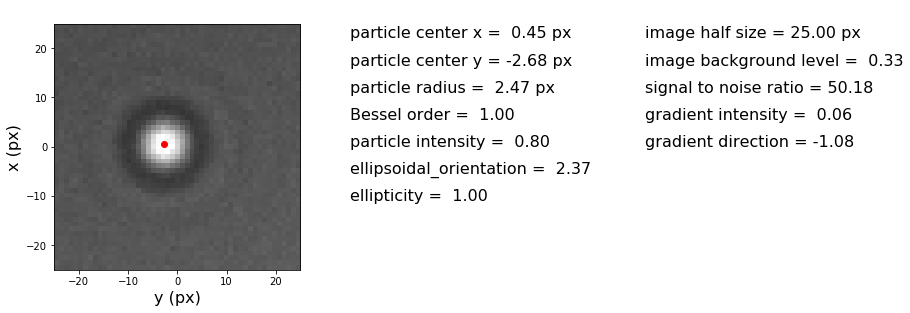

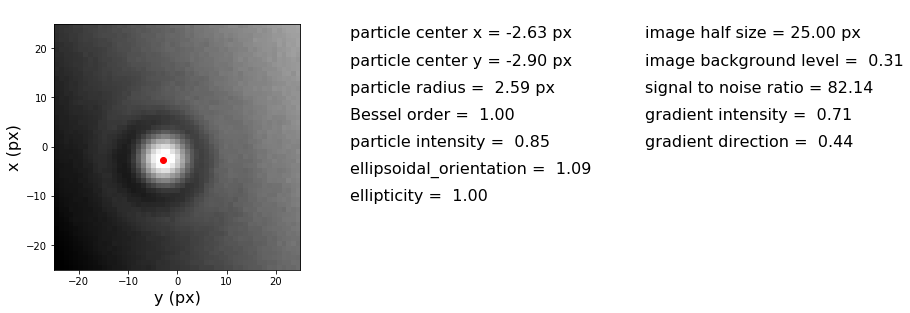

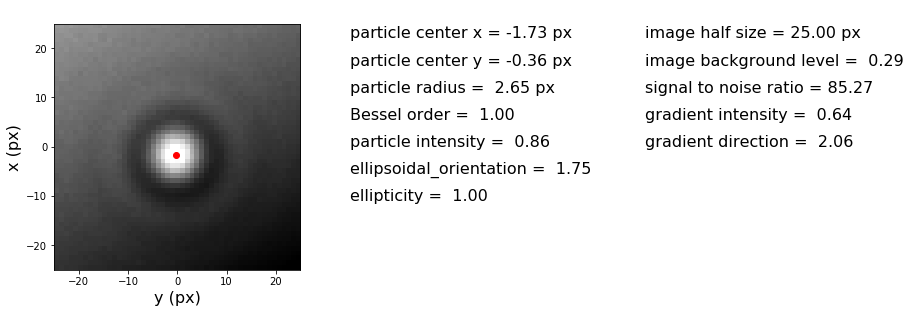

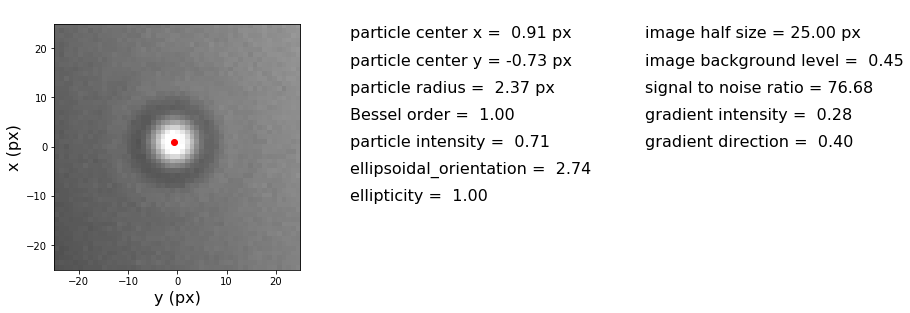

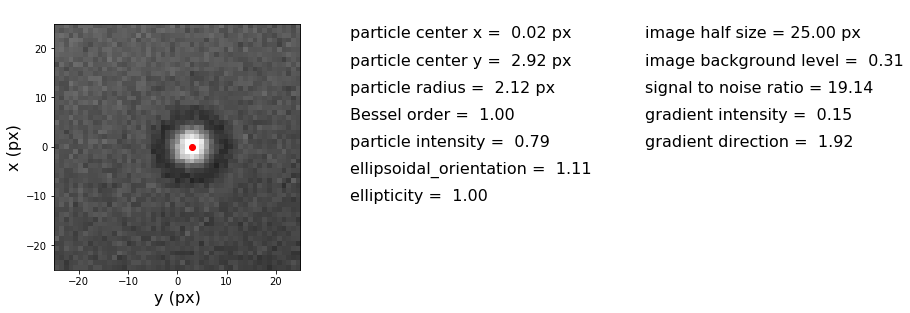

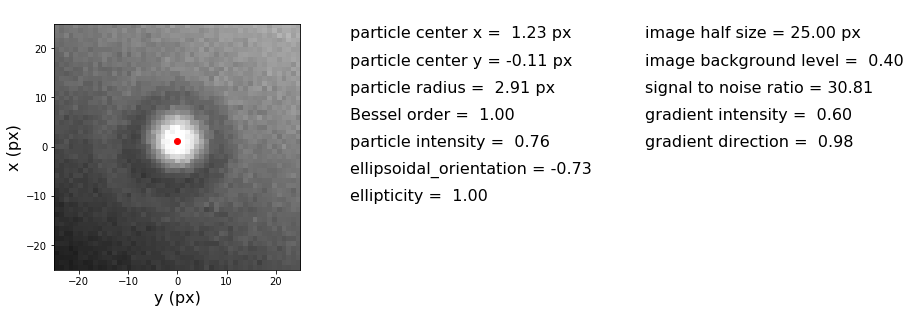

In [3]:
### Define image properties
%matplotlib inline
from numpy.random import randint, uniform, normal, choice
from math import pi

image_parameters_function = lambda : deeptrack.get_image_parameters(
    particle_center_x_list=lambda : [normal(0 ,2, 1), ],
    particle_center_y_list=lambda : [normal(0 ,2, 1), ],
    particle_radius_list=lambda : uniform(2, 3, 1),
    particle_bessel_orders_list=lambda : [[1, 2], ],
    particle_intensities_list=lambda : [[uniform(.7, .9, 1), -uniform(.2, .3, 1)], ],
    image_half_size=lambda : 25,
    image_background_level=lambda : uniform(.2, .5),
    signal_to_noise_ratio=lambda : uniform(5, 100),
    gradient_intensity=lambda : uniform(0, .8),
    gradient_direction=lambda : uniform(-pi, pi),
    ellipsoidal_orientation=lambda : uniform(-pi, pi, 1),
    ellipticity=lambda : 1)

### Define image generator
image_generator = lambda : deeptrack.get_image_generator(image_parameters_function)

### Show some examples of generated images
number_of_images_to_show = 10

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_images_to_show:
        break
    
    deeptrack.plot_sample_image(image, image_parameters)

## 3. USE A PRETRAINED DEEP LEARNING NETWORK

The pretraiend network saved in the file "DeepTrack - Example 2 - Pretrained network.h5" is loaded and its performance tested on a selected video.

Change the video file to select the various videos:

1. DeepTrack - Example 2 - Optically Trapped Particle Good.mp4
2. DeepTrack - Example 2 - Optically Trapped Particle Bad.mp4

Note that the file "DeepTrack - Example 2 - Pretrained network.h5" and the video file must be in the same folder as this notebook.

Comments:
1. <strong>number_frames_to_be_tracked</strong> can be changed to track different number of frames. If number_frames is equal to 0 then the whole video is tracked. //
2. <strong>frame_normalize</strong> can be changed to chose if the images should be normalized before tracking, 0 for not normalizing and 1 for normalizing. 
3. <strong>frame_enhance</strong> can be changed to chose if, and how much, the images should be enhanced before tracking. 


In [4]:
### Define the video file to be tracked
video_file_name = 'DeepTrack - Example 2 - Optically Trapped Particle Good.mp4'

### Define the number of frames to be tracked
number_frames_to_be_tracked = 2

### Preprocess the images
frame_normalize = 0
frame_enhance = 1

### Load the pretrained network
saved_network_file_name = 'DeepTrack - Example 2 - Pretrained network.h5'
network = deeptrack.load(saved_network_file_name)

### Track the video
(number_tracked_frames, frames, predicted_positions) = deeptrack.track_video_single_particle(
    video_file_name, 
    network, 
    number_frames_to_be_tracked,
    frame_normalize,
    frame_enhance)

Using TensorFlow backend.


## 4. SHOW EXAMPLES OF TRACKED FRAMES

The tracked frames are shown. 

Comments:
1. The <font color='#e6661a'><strong>orange<strong></font> symbol is the deep learning network prediction for the position (x, y). 


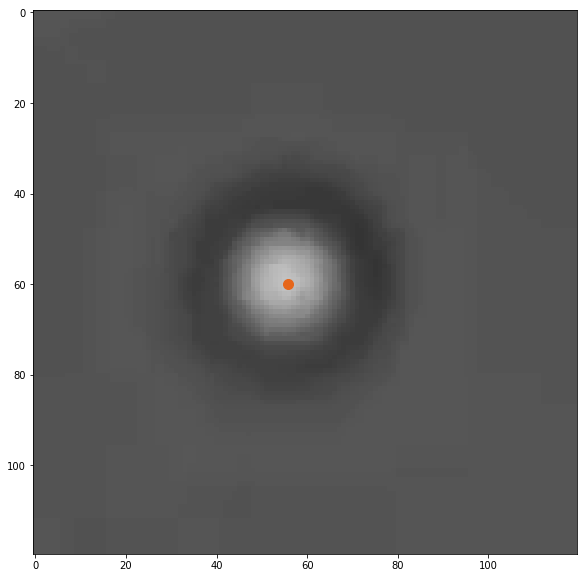

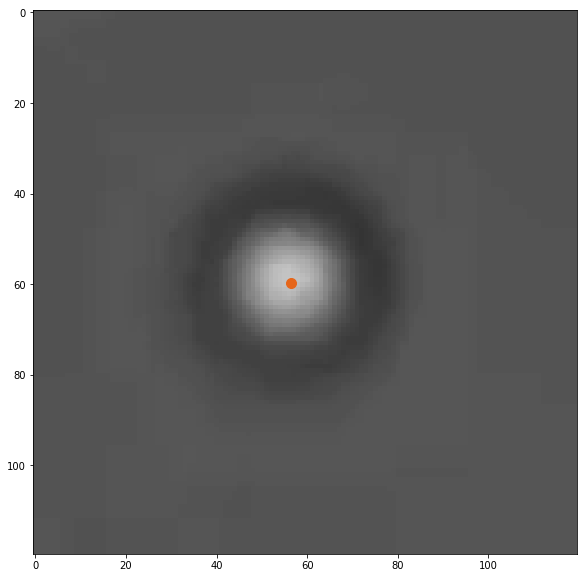

In [5]:
### Visualize tracked frames (maximum 10 frames at a time)
deeptrack.show_tracked_frames_single_particle(
    min(number_tracked_frames, 10), 
    frames, 
    predicted_positions)